In [2]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Loading the Data : 
data = pd.read_csv('/content/SVMtrain.csv')
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [5]:
# To define the input and output feature
x = data.drop(['Embarked','PassengerId','Sex'],axis=1)
y = data.Embarked
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [6]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.40058	training's multi_logloss: 0.40058	valid_0's multi_logloss: 0.495354	valid_0's multi_logloss: 0.495354
[40]	training's multi_logloss: 0.289444	training's multi_logloss: 0.289444	valid_0's multi_logloss: 0.456852	valid_0's multi_logloss: 0.456852
[60]	training's multi_logloss: 0.229182	training's multi_logloss: 0.229182	valid_0's multi_logloss: 0.458498	valid_0's multi_logloss: 0.458498
[80]	training's multi_logloss: 0.189736	training's multi_logloss: 0.189736	valid_0's multi_logloss: 0.464943	valid_0's multi_logloss: 0.464943
[100]	training's multi_logloss: 0.162113	training's multi_logloss: 0.162113	valid_0's multi_logloss: 0.47667	valid_0's multi_logloss: 0.47667


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [7]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9563
Testing accuracy 0.8265


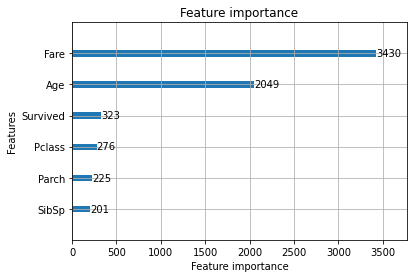

In [8]:
lgb.plot_importance(model)

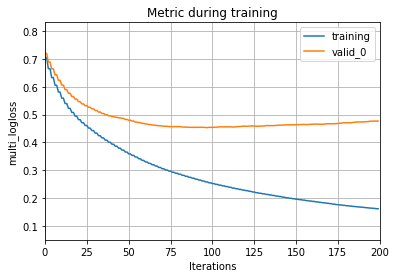

In [9]:
lgb.plot_metric(model)

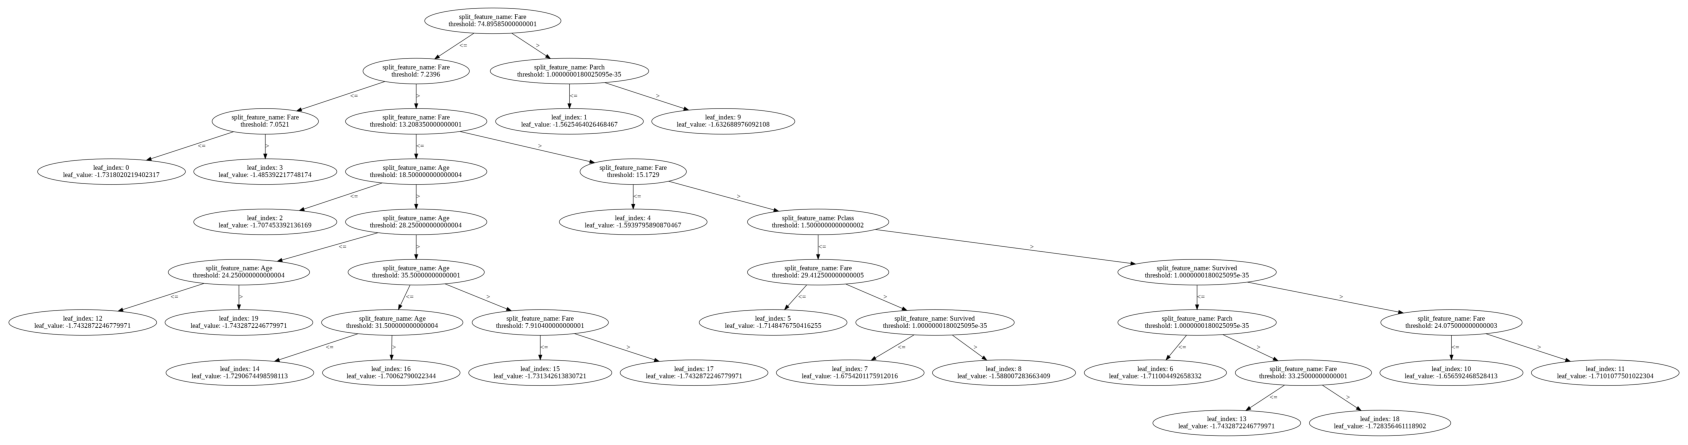

In [10]:
lgb.plot_tree(model,figsize=(30,40))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


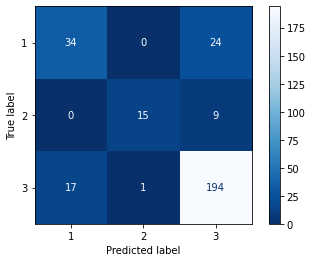

In [11]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [12]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.67      0.59      0.62        58
           2       0.94      0.62      0.75        24
           3       0.85      0.92      0.88       212

    accuracy                           0.83       294
   macro avg       0.82      0.71      0.75       294
weighted avg       0.82      0.83      0.82       294



In [ ]:
#Reference: https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/